# Part II - (Ford GoBike Dataset Visualization)
## by (Ugochukwu Ayomide Onyebuchi)

## Investigation Overview

This notebook investigates the behaviour of the various genders and user types in the bike sharing business in order to recognize patterns and also trip duration behaviours


## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. This data covers the period of February in 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [15]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('new_bike_data.csv', parse_dates=['start_time'])

In [9]:
# Convert day_of_week to categorical variable
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'])
df['day_of_week'] = df['day_of_week'].astype(ordered_var)

In [18]:
color1 = sb.color_palette("rocket")[0]
color2 = sb.color_palette('Blues')[4]

# Let's define a function we can reuse in other places
def plotBar(data, x, color, xlabel, ylabel, title):    
    sb.countplot(data=data, x=x, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);

## (Distribution of Gender)

Gender refers to the gender of the bike-share users, we have Male, Female and Other
Majority of the bike sharers are male and it is interesting to note that other type of gender was captured in 'Other'

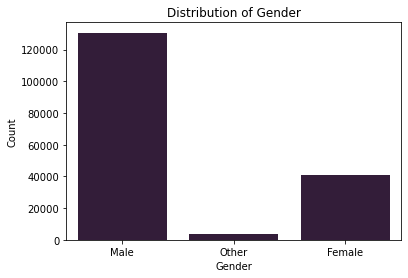

In [6]:
plotBar(df, x='member_gender', color=color1, xlabel='Gender', 
        ylabel='Count', title='Distribution of Gender')

## (Distribution of User Type)

A bike-share user could be of two types: Customer and Subscriber. A large portion of the users are Subscribers.

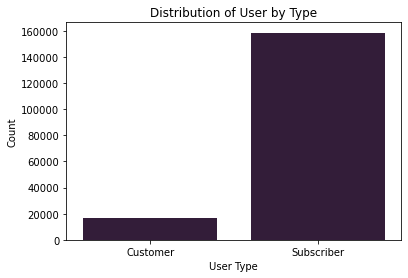

In [7]:
plotBar(df, x='user_type', color=color1, xlabel='User Type', 
        ylabel='Count', title='Distribution of User by Type')

## (Trips by week day)

Thursday seems to be a very popular day for taking a trip, followed by Tuesdays. On weekends the amount of trips are lower in comparison to weekdays

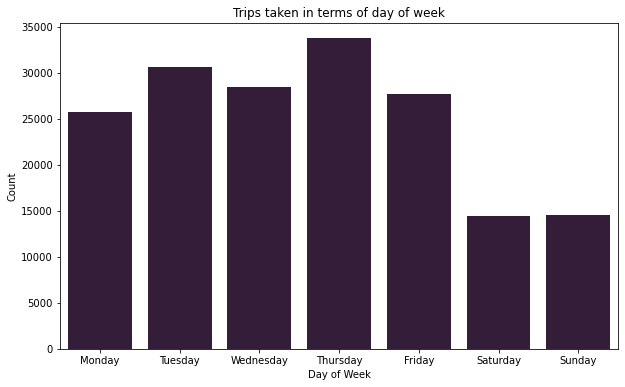

In [10]:
plt.figure(figsize=[10, 6])
sb.countplot(data=df, x=df['day_of_week'], color=color1)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Trips taken in terms of day of week');

## (Trips by hour of the day)

Well, most trips seem to happen around the 17th hour(5:00pm) and closely following 8th hour(8:00am), coincidentally that's work hour starting and ending hour 🤔

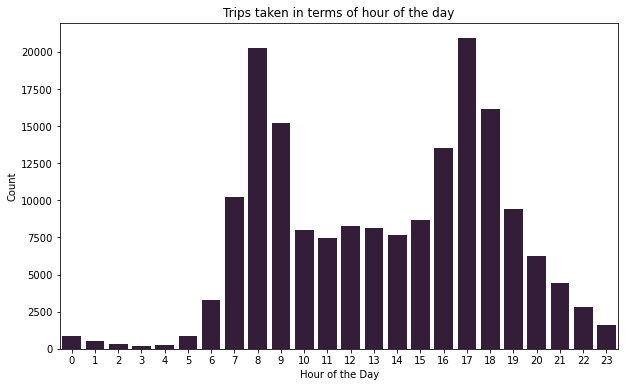

In [16]:
plt.figure(figsize=[10, 6])
sb.countplot(data=df, x=df['start_time'].dt.hour, color=color1)
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Trips taken in terms of hour of the day');

## (Distribution of Duration)

Duration has a long-tailed distribution, with a lot of durations on the low end and very few on the high end. When plotted on a log-scale, most durations fall in the 900-1000 seconds bin

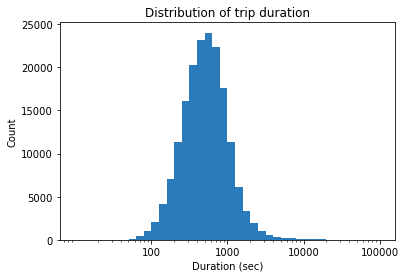

In [19]:
# Get the ticks for bins between [0 - maximum duration]
bins = 10 ** np.arange(1, 5+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [100, 1000, 10000, 100000]
# Convert ticks into string values, to be displayed dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=df, x='duration_sec', bins=bins, color=color2);

plt.xscale('log')
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title('Distribution of trip duration')

# Apply x-ticks
plt.xticks(ticks, labels);

## (User Type vs Gender)

Here we look at the various user types and how they spread across gender, Females tend to be customers than subscribers, Males tend to be subscribers than customers, The other group of gender also tend to be customers than subscribers.

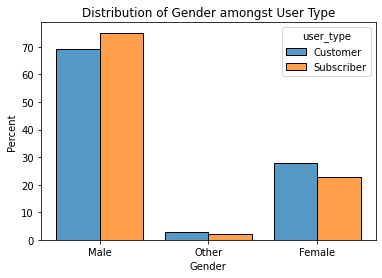

In [20]:
sb.histplot(x = df['member_gender'], hue=df['user_type'], multiple="dodge", 
                  stat = 'percent', shrink = 0.8, common_norm=False)
plt.xlabel('Gender')
plt.title('Distribution of Gender amongst User Type');

## (User Type vs Duration)

Here we inspect how much each user type spends on a trip on average, we see that Customers seem to spend more time during a trip than subscribers do.

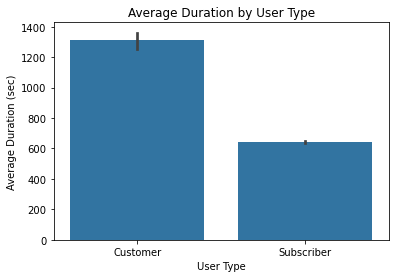

In [21]:
color = sb.color_palette()[0]
sb.barplot(data=df, x='user_type', y='duration_sec', color=color);

plt.xlabel('User Type')
plt.ylabel('Average Duration (sec)')
plt.title('Average Duration by User Type');

## (User Type vs Gender vs Duration)

- On average female customers spend around 1450 seconds on a trip, male customers spend 1250 seconds on a trip, while the 'other' gender spends the highest with about 1600 seconds on a trip
- Male subscribers on average spend a little above 600 seconds, while female subscribers spend about 700 seconds on a trip, the 'other' gender spends about 900 seconds.

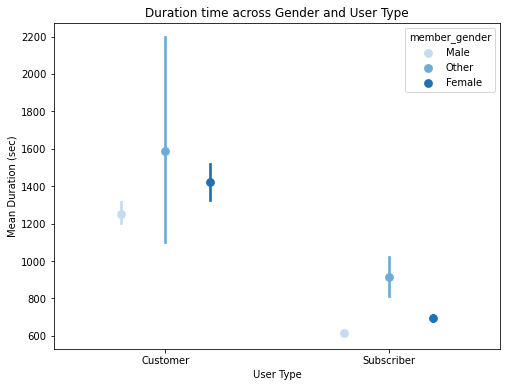

In [22]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x = 'user_type', y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Duration time across Gender and User Type')
plt.ylabel('Mean Duration (sec)')
plt.xlabel('User Type');

In [25]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

^C
